In [19]:
import os
import pandas as pd
import json

In [20]:
with open("total_interest.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

In [21]:
df.set_index("question", inplace=True)

In [22]:
fewshot_files = ["with_fewshot/" + x for x in os.listdir("with_fewshot") if x.endswith(".csv")]
non_fewshot_files = ["without_fewshot/" + x for x in os.listdir("without_fewshot") if x.endswith(".csv")]

In [23]:
fewshot_files

['with_fewshot/groq_llama-3.3-70b-versatile_False_False_comparison.csv',
 'with_fewshot/openai_gpt-4o_False_False_comparison.csv',
 'with_fewshot/groq_gemma2-9b-it_False_False_comparison.csv',
 'with_fewshot/groq_llama-3.1-8b-instant_False_False_comparison.csv',
 'with_fewshot/openai_gpt-4.1_False_True_comparison.csv',
 'with_fewshot/openai_gpt-4o_True_True_comparison.csv',
 'with_fewshot/groq_qwen-qwen3-32b_False_False_comparison.csv',
 'with_fewshot/openai_gpt-4.1_True_True_comparison.csv',
 'with_fewshot/groq_llama-3.3-70b-versatile_False_True_comparison.csv',
 'with_fewshot/openai_gpt-4o_False_True_comparison.csv',
 'with_fewshot/groq_llama-3.3-70b-versatile_True_True_comparison.csv',
 'with_fewshot/groq_deepseek-r1-distill-llama-70b_False_False_comparison.csv',
 'with_fewshot/openai_gpt-4.1_False_False_comparison.csv',
 'with_fewshot/groq_compound-beta_False_False_comparison.csv']

In [35]:
dfs = []
for file in fewshot_files + non_fewshot_files:
    if file.endswith(".csv"):
        model_name = file.split("/")[-1].removesuffix(".csv")
        suffix = "non_fewshot" if "without_fewshot" in file else "fewshot"
        df_ = pd.read_csv(file)
        df_.drop(columns = ["query", "all_values_found"], inplace=True, errors='ignore')
        output_cols = {k: f"{model_name}_{suffix}_{k}" for k in df_.columns if k not in ["question"]}
        df_ = df_.rename(columns=output_cols)
        df_.set_index("question", inplace=True)
        dfs.append(df_)


In [36]:
output_cols

{'model_prediction': 'groq_allam-2-7b_False_False_comparison_non_fewshot_model_prediction',
 'executable': 'groq_allam-2-7b_False_False_comparison_non_fewshot_executable',
 'correct': 'groq_allam-2-7b_False_False_comparison_non_fewshot_correct'}

In [39]:
## Merge the dataframes on the basis of index (query)
merged = df
for df_ in dfs:
    merged = pd.merge(merged, df_, left_index=True, right_index=True, how="inner")
    # Uncomment the line below to break after the first merge
    # break

In [41]:
merged.to_csv("merged_results.csv")

In [49]:
## For the different models, we can now analyze the merged DataFrame
# Example: Count the number of correct and executed queries for each model
merged.describe(include='all')

,query,all_values_found,hardness,groq_llama-3.3-70b-versatile_False_False_comparison_fewshot_model_prediction,groq_llama-3.3-70b-versatile_False_False_comparison_fewshot_executable,groq_llama-3.3-70b-versatile_False_False_comparison_fewshot_correct,openai_gpt-4o_False_False_comparison_fewshot_model_prediction,openai_gpt-4o_False_False_comparison_fewshot_executable,openai_gpt-4o_False_False_comparison_fewshot_correct,groq_gemma2-9b-it_False_False_comparison_fewshot_model_prediction,...,groq_deepseek-r1-distill-llama-70b_False_False_comparison_non_fewshot_correct,openai_gpt-4.1_False_False_comparison_non_fewshot_model_prediction,openai_gpt-4.1_False_False_comparison_non_fewshot_executable,openai_gpt-4.1_False_False_comparison_non_fewshot_correct,groq_compound-beta_False_False_comparison_non_fewshot_model_prediction,groq_compound-beta_False_False_comparison_non_fewshot_executable,groq_compound-beta_False_False_comparison_non_fewshot_correct,groq_allam-2-7b_False_False_comparison_non_fewshot_model_prediction,groq_allam-2-7b_False_False_comparison_non_fewshot_executable,groq_allam-2-7b_False_False_comparison_non_fewshot_correct
count,100,100,100,98,100,100,100,100,100,100,...,100,100,100,100,100,100,100,0.0,100,100
unique,68,2,4,70,2,2,69,2,2,1,...,1,71,2,2,1,1,1,NaN,1,1
top,SELECT T1.total_cost FROM projects AS T1 WHERE...,True,medium,SELECT total_cost FROM projects WHERE title = ...,True,True,SELECT total_cost FROM projects WHERE title = ...,True,True,-- SQL generation failed,...,False,SELECT total_cost FROM projects WHERE title = ...,True,True,-- SQL generation failed,False,False,NaN,False,False
freq,2,78,34,2,95,51,2,99,52,100,...,100,2,87,50,100,100,100,NaN,100,100
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
merged.T

question,Find the total cost of the project Theseus,Show total cost of project with title Theseus,Show me the acronyms of projects that started in 2018,Get acronyms of projects beginning in 2018,Show me the titles of projects that started before 2016,Find titles of projects which started earlier than 2016,Find institutions from the region of Nordjylland,Show the name of institutions based in Nordjylland,Find the name of principal investigators in projects that started in 2014,Show the full name of people being investigators in projects that began in 2014,...,Which non-EU entity has recieved the most funding through a project?,Which entity located outside of the EU has received the most funding?,Which non-EU entity has recieved the least funding through a project?,Which entity located outside of the EU has received the least funding?,How many non-EU entities have participated in projects?,Which entities that are located outside of the European Union have participated in projects?,Show all of the programmes with titles that are related to climate,List the programms that have the term climate in the title,Show the title and amount of funds that have been allocated per programme,List all of the titles and the amount of funding that has been dispersed per programme
query,SELECT T1.total_cost FROM projects AS T1 WHERE...,SELECT T1.total_cost FROM projects AS T1 WHERE...,SELECT acronym FROM projects WHERE start_year ...,SELECT acronym FROM projects WHERE start_year ...,SELECT title FROM projects WHERE start_year < ...,SELECT title FROM projects WHERE start_year < ...,SELECT T1.institutions_name FROM institutions ...,SELECT T1.institutions_name FROM institutions ...,SELECT T2.full_name FROM projects AS T1 join p...,SELECT T2.full_name FROM projects AS T1 join p...,...,"SELECT t1.member_name, p.ec_max_contribution F...","SELECT t1.member_name, p.ec_max_contribution F...","SELECT t1.member_name, p.ec_max_contribution F...","SELECT t1.member_name, p.ec_max_contribution F...",SELECT count(distinct t1.member_name) FROM pro...,SELECT distinct t1.member_name FROM project_me...,SELECT p.title from programmes as p WHERE p.ti...,SELECT p.title from programmes as p WHERE p.ti...,"SELECT t1.title, sum(t3.ec_max_contribution) f...","SELECT t1.title, sum(t3.ec_max_contribution) f..."
all_values_found,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,True,True
hardness,easy,easy,easy,easy,easy,easy,medium,medium,medium,medium,...,extra,extra,extra,extra,extra,extra,medium,medium,hard,hard
groq_llama-3.3-70b-versatile_False_False_comparison_fewshot_model_prediction,SELECT total_cost FROM projects WHERE title = ...,SELECT total_cost FROM projects WHERE title = ...,SELECT acronym FROM projects WHERE start_year ...,SELECT acronym FROM projects WHERE start_year ...,SELECT title FROM projects WHERE start_year < ...,SELECT title FROM projects WHERE start_year < ...,SELECT institutions_name FROM institutions WHE...,SELECT institutions_name FROM institutions WHE...,SELECT principal_investigator FROM projects WH...,SELECT full_name FROM people JOIN projects ON ...,...,"SELECT project_members.member_name, SUM(projec...","SELECT project_members.member_name, SUM(projec...","SELECT project_members.member_name, SUM(projec...","SELECT project_members.member_name, SUM(projec...",SELECT COUNT(DISTINCT project_members.member_n...,SELECT DISTINCT project_members.member_name FR...,SELECT title FROM programmes WHERE title LIKE ...,SELECT title FROM programmes WHERE title LIKE ...,"SELECT programmes.title, SUM(projects.total_co...",NaN
groq_llama-3.3-70b-versatile_False_False_comparison_fewshot_executable,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
groq_compound-beta_False_False_comparison_non_fewshot_executable,False,False,False,False,False,False,False,False,False,False,...

In [58]:
correct_cols = [col for col in merged.columns if col.endswith("correct")]
executed_cols = [col for col in merged.columns if col.endswith("executable")]
# merged[result_cols + ["hardness"]]

In [64]:
model_names = [x.removesuffix("correct") for x in correct_cols]

In [78]:
len(model_names)

30

In [79]:
merged["hardness"].value_counts()

hardness
medium    34
extra     26
easy      23
hard      17
Name: count, dtype: int64

In [80]:
summary = {"easy": 23, "medium": 34, "hard": 17, "extra": 26}

In [81]:
new_json = []
for model_name in model_names:
    if "generated" in model_name:
        continue
    model_name_ = model_name.replace("non_fewshot", "0fewshot")
    try:
        provider, model, descriptive, use_columns, x,  use_fewshot, _ = model_name_.split("_")
    except:
        print(f"Skipping model {model_name} due to unexpected format.")
        continue
    use_fewshot = True if use_fewshot == "fewshot" else False
    diction = {
        "provider": provider,
        "descriptive": descriptive,
        "use_columns": use_columns,
        "use_fewshot": use_fewshot,
        "model": model,
    }
    model_name = model_name[:-1]
    diction["easy_correct"] = merged[merged["hardness"] == "easy"][f"{model_name}_correct"].sum()
    diction["medium_correct"] = merged[merged["hardness"] == "medium"][f"{model_name}_correct"].sum()
    diction["hard_correct"] = merged[merged["hardness"] == "hard"][f"{model_name}_correct"].sum()
    diction["extra_hard_correct"] = merged[merged["hardness"] == "extra_hard"][f"{model_name}_correct"].sum()
    diction["easy_executable"] = merged[merged["hardness"] == "easy"][f"{model_name}_executable"].sum()
    diction["medium_executable"] = merged[merged["hardness"] == "medium"][f"{model_name}_executable"].sum()
    diction["hard_executable"] = merged[merged["hardness"] == "hard"][f"{model_name}_executable"].sum()
    diction["extra_hard_executable"] = merged[merged["hardness"] == "extra_hard"][f"{model_name}_executable"].sum()
    diction["total_correct"] = merged[f"{model_name}_correct"].sum()
    diction["total_executable"] = merged[f"{model_name}_executable"].sum()
    diction["easy_correct_percentage"] = diction["easy_correct"] / summary["easy"] if summary["easy"] > 0 else 0
    diction["medium_correct_percentage"] = diction["medium_correct"] / summary["medium"] if summary["medium"] > 0 else 0
    diction["hard_correct_percentage"] = diction["hard_correct"] / summary["hard"] if summary["hard"] > 0 else 0
    diction["extra_hard_correct_percentage"] = diction["extra_hard_correct"] / summary["extra"] if summary["extra"] > 0 else 0
    diction["total_correct_executed"] = diction["total_correct"] / diction["total_executable"] if diction["total_executable"] > 0 else 0
    diction["easy_correct_executed"] = diction["easy_correct"] / diction["easy_executable"] if diction["easy_executable"] > 0 else 0
    diction["medium_correct_executed"] = diction["medium_correct"] / diction["medium_executable"] if diction["medium_executable"] > 0 else 0
    diction["hard_correct_executed"] = diction["hard_correct"] / diction["hard_executable"] if diction["hard_executable"] > 0 else 0
    diction["extra_hard_correct_executed"] = diction["extra_hard_correct"] / diction["extra_hard_executable"] if diction["extra_hard_executable"] > 0 else 0
    new_json.append(diction)


In [84]:
model_infos = pd.DataFrame(new_json)

In [85]:
model_infos.to_csv("model_infos.csv", index=False)

'False'

### Show comparison of different models when not using fewshot, or additional information about the columns

In [ ]:
df_new = model_infos[(model_infos["use_fewshot"] == True) & (model_infos["use_columns"] == "False") & (model_infos["descriptive"] == "False")]

In [104]:
print(df_new[["provider", "model", "total_correct", "total_executable", "total_correct_executed", "easy_correct_percentage", "medium_correct_percentage", "hard_correct_percentage", "extra_hard_correct_percentage"]].sort_values(by="total_correct", ascending=False).to_string(index=False))

provider                         model  total_correct  total_executable  total_correct_executed  easy_correct_percentage  medium_correct_percentage  hard_correct_percentage  extra_hard_correct_percentage
  openai                        gpt-4o             55                99                0.555556                 0.913043                   0.500000                 0.705882                            0.0
  openai                       gpt-4.1             50                87                0.574713                 0.826087                   0.382353                 0.764706                            0.0
    groq       llama-3.3-70b-versatile             28                59                0.474576                 0.782609                   0.205882                 0.176471                            0.0
    groq          llama-3.1-8b-instant             21                40                0.525000                 0.608696                   0.176471                 0.058824            

In [105]:
### Show the comparison of different models when not using additional information about the columns
### The use_fewshot column is pivoted to show the difference between fewshot and non-fewshot models
df_new = model_infos[(model_infos["use_columns"] == "False") & (model_infos["descriptive"] == "False")]
pivoted = df_new.pivot_table(index=["provider", "model"], columns="use_fewshot", values=["total_correct", "total_executable", "total_correct_executed", "easy_correct_percentage", "medium_correct_percentage", "hard_correct_percentage", "extra_hard_correct_percentage"],)

In [109]:
## Keep the columns in the format ["total_correct", "total_executable", "total_correct_executed", "easy_correct_percentage", "medium_correct_percentage", "hard_correct_percentage", "extra_hard_correct_percentage"]
pivoted = pivoted[["total_correct", "total_executable", "total_correct_executed", "easy_correct_percentage", "medium_correct_percentage", "hard_correct_percentage", "extra_hard_correct_percentage"]]

In [111]:
pivoted.rename(columns={True: "fewshot", False: "non_fewshot"})

total_correct         total_executable  \
use_fewshot                              non_fewshot fewshot      non_fewshot   
provider model                                                                  
groq     allam-2-7b                              0.0     NaN              0.0   
         compound-beta                           0.0     0.0              0.0   
         deepseek-r1-distill-llama-70b           0.0     0.0              0.0   
         gemma2-9b-it                           15.0     0.0             18.0   
         llama-3.1-8b-instant                   21.0    29.0             40.0   
         llama-3.3-70b-versatile                28.0    51.0             59.0   
         qwen-qwen3-32b                          0.0     0.0              0.0   
openai   gpt-4.1                                50.0    55.0             87.0   
         gpt-4o                                 55.0    52.0             99.0   

                                               total_correct_executed  \
use_fewshot                            fewshot            non_fewshot   
provider model                                                          
groq     allam-2-7b                        NaN               0.000000   
         compound-beta                     0.0               0.000000   
         deepseek-r1-distill-llama-70b     0.0               0.000000   
         gemma2-9b-it                      0.0               0.833333   
         llama-3.1-8b-instant             60.0               0.525000   
         llama-3.3-70b-versatile          95.0               0.474576   
         qwen-qwen3-32b                    0.0               0.000000   
openai   gpt-4.1                          99.0               0.574713   
         gpt-4o                           99.0               0.555556   

                                                 easy_correct_percentage  \
use_fewshot                              fewshot             non_fewshot   
provider model                                                             
groq     allam-2-7b                          NaN                0.000000   
         compound-beta                  0.000000                0.000000   
         deepseek-r1-distill-llama-70b  0.000000                0.000000   
         gemma2-9b-it                   0.000000                0.434783   
         llama-3.1-8b-instant           0.483333                0.608696   
         llama-3.3-70b-versatile        0.536842                0.782609   
         qwen-qwen3-32b                 0.000000                0.000000   
openai   gpt-4.1                        0.555556                0.826087   
         gpt-4o                         0.525253                0.913043   

                                                 medium_correct_percentage  \
use_fewshot                              fewshot               non_fewshot   
provider model                                                               
groq     allam-2-7b                          NaN                  0.000000   
         compound-beta                  0.000000                  0.000000   
         deepseek-r1-distill-llama-70b  0.000000                  0.000000   
         gemma2-9b-it                   0.000000                  0.088235   
         llama-3.1-8b-instant           0.608696                  0.176471   
         llama-3.3-70b-versatile        0.913043                  0.205882   
         qwen-qwen3-32b                 0.000000                  0.000000   
openai   gpt-4.1                        0.869565                  0.382353   
         gpt-4o                         0.826087                  0.500000   

                                                 hard_correct_percentage  \
use_fewshot                              fewshot             non_fewshot   
provider model                                                             
groq     allam-2-7b                          NaN                0.000000   
         compound-beta             

In [114]:
### Show the comparison when same model has different configurations
df_descriptive= model_infos[model_infos["use_columns"] == "True"]

In [119]:
df_descriptive = model_infos[model_infos["model"].isin(df_descriptive["model"].unique())]

In [120]:
pivoted_new = df_descriptive.pivot_table(index=["provider", "model", "use_columns", "descriptive"], columns="use_fewshot", values=["total_correct", "total_executable", "total_correct_executed", "easy_correct_percentage", "medium_correct_percentage", "hard_correct_percentage", "extra_hard_correct_percentage"],)

In [122]:
pivoted_new = pivoted_new[["total_correct", "total_executable", "total_correct_executed", "easy_correct_percentage", "medium_correct_percentage", "hard_correct_percentage", "extra_hard_correct_percentage"]]

In [125]:
display(pivoted_new)


total_correct        \
use_fewshot                                                      False True    
provider model                   use_columns descriptive                       
groq     llama-3.3-70b-versatile False       False                28.0  51.0   
                                 True        False                53.0  59.0   
                                             True                 52.0  54.0   
openai   gpt-4.1                 False       False                50.0  55.0   
                                 True        False                59.0  63.0   
                                             True                 59.0  57.0   
         gpt-4o                  False       False                55.0  52.0   
                                 True        False                64.0  64.0   
                                             True                 60.0  62.0   

                                                         total_executable  \
use_fewshot                                                         False   
provider model                   use_columns descriptive                    
groq     llama-3.3-70b-versatile False       False                   59.0   
                                 True        False                   98.0   
                                             True                    99.0   
openai   gpt-4.1                 False       False                   87.0   
                                 True        False                  100.0   
                                             True                   100.0   
         gpt-4o                  False       False                   99.0   
                                 True        False                  100.0   
                                             True                   100.0   

                                                                 \
use_fewshot                                               True    
provider model                   use_columns descriptive          
groq     llama-3.3-70b-versatile False       False         95.0   
                                 True        False         97.0   
                                             True          96.0   
openai   gpt-4.1                 False       False         99.0   
                                 True        False        100.0   
                                             True         100.0   
         gpt-4o                  False       False         99.0   
                                 True        False        100.0   
                                             True         100.0   

                                                         total_correct_executed  \
use_fewshot                                                               False   
provider model                   use_columns descriptive                          
groq     llama-3.3-70b-versatile False       False                     0.474576   
                                 True        False                     0.540816   
                                             True                      0.525253   
openai   gpt-4.1                 False       False                     0.574713   
                                 True        False                     0.590000   
                                             True                      0.590000   
         gpt-4o                  False       False                     0.555556   
                                 True        False                     0.640000   
                                             True                      0.600000   

                                                                    \
use_fewshot                                                  True    
provider model                   use_columns descriptive             
groq     llama-3.3-70b-versatile False       False        0.536842   
                                 True        False        0.608247   
                   

In [141]:
pivoted_new.columns

MultiIndex([(                'total_correct', False),
            (                'total_correct',  True),
            (             'total_executable', False),
            (             'total_executable',  True),
            (       'total_correct_executed', False),
            (       'total_correct_executed',  True),
            (      'easy_correct_percentage', False),
            (      'easy_correct_percentage',  True),
            (    'medium_correct_percentage', False),
            (    'medium_correct_percentage',  True),
            (      'hard_correct_percentage', False),
            (      'hard_correct_percentage',  True),
            ('extra_hard_correct_percentage', False),
            ('extra_hard_correct_percentage',  True)],
           names=[None, 'use_fewshot'])

<Axes: title={'center': 'Comparison of Fewshot and Non-Fewshot Models'}, xlabel='Models', ylabel='Total Executable Queries'>

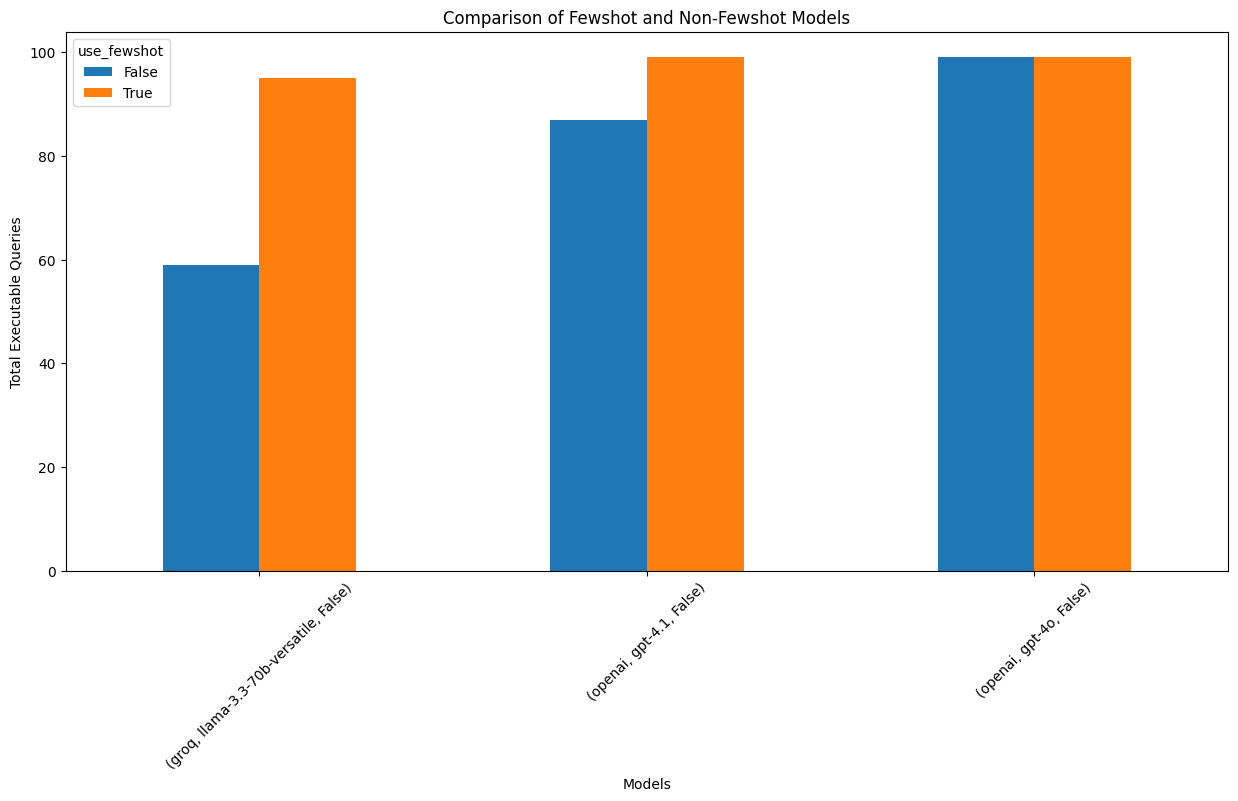

In [148]:

pivoted_new.xs("False", level="use_columns")["total_executable"].plot(kind='bar', figsize=(15, 7), title="Comparison of Fewshot and Non-Fewshot Models", ylabel="Total Executable Queries", xlabel="Models", xlim=(-0.5, len(pivoted_new)-0.5), rot=45)

In [151]:
pivoted_other = df_descriptive.pivot_table(index=["provider", "model", "use_columns", "use_fewshot"], columns="descriptive", values=["total_correct"],)

<Axes: title={'center': 'Comparison When Description is Used'}, xlabel='Models', ylabel='Total Executable Queries'>

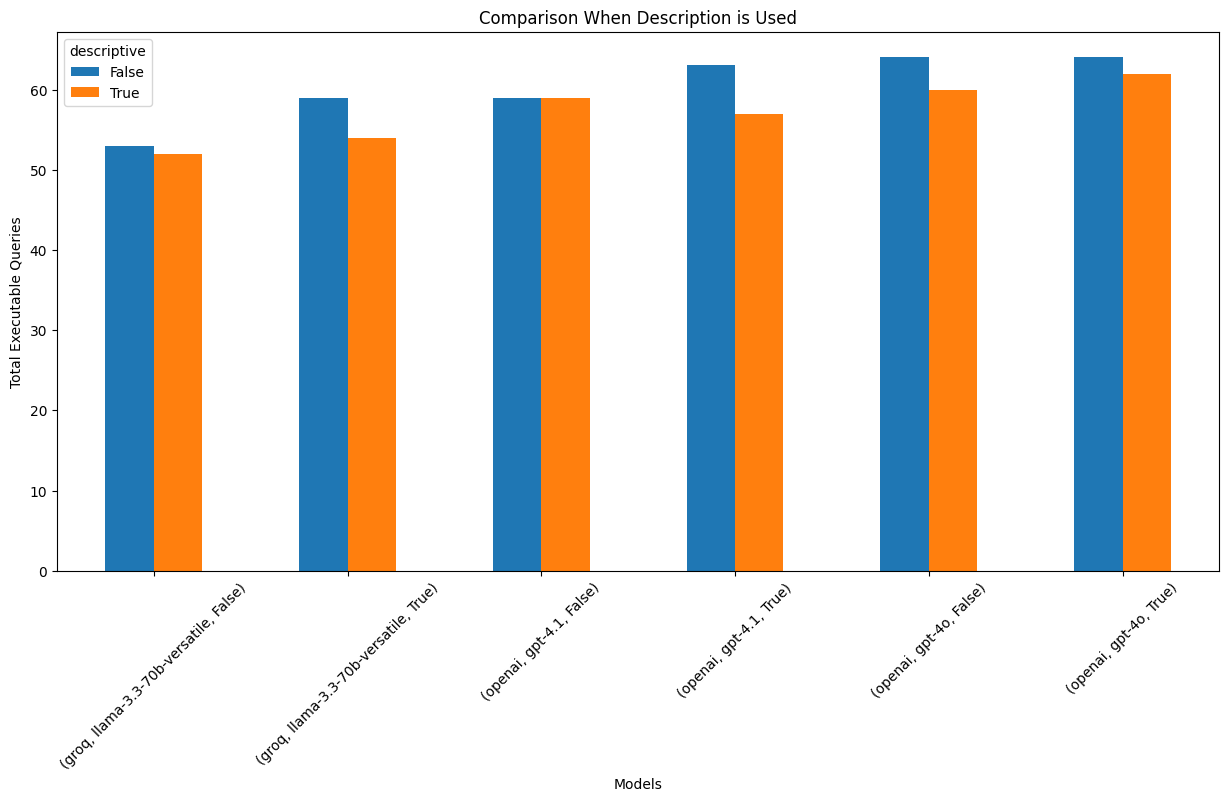

In [154]:
pivoted_other.xs("True", level="use_columns")["total_correct"].plot(kind='bar', figsize=(15, 7), title="Comparison When Description is Used", ylabel="Total Executable Queries", xlabel="Models", xlim=(-0.5, len(pivoted_other)-0.5), rot=45)

In [ ]:
#### This will show how the models perform for different hardness levels 